# P6

Due: 12/11/19, 11:59pm 

In this assignment, we'll look at regression and clustering methods.

First, let's get our imports and system set up. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import linear_model
from sklearn import cluster

## Regression 

For this part of the project we will be using a famous dataset that looks at 1000 users listening habits. 
http://ocelma.net/MusicRecommendationDataset/lastfm-1K.html

The data set is large (~650MB compressed, ~2.5GB uncompressed). 

The data is formatted one entry per line, tab-separated.  

### Task 1 (20 pts)
The first task is to process this data to recover some song statistics.  In particular, we would like to create (and save, using pickle), a pandas dataframe that contains:
    * the number of times a song has been played
    * percentage of the plays that came from users who self-identified as male
    * average age of the listener
    * percentage of plays that came from a user who played the song exactly once
    * percentage of plays that came from a user who played the song at least five times  
    
If there any missing values, decide how you will deal with them, and summarize your approach in **Task 2**.  

In [2]:
user_profiles = pd.read_table('userid-profile.tsv', sep = '\t') #reading the user profiles data

In [3]:
#setting the column values of user_profiles data
user_profiles.columns = ['user_id','gender','age','country','r_date']

In [4]:
user_data = pd.read_table('userid-timestamp-artid-artname-traid-traname.tsv', error_bad_lines=False, 
                          header = None, sep = '\t',nrows = 500000,
                         names = ['user_id','timestamp','artist_id','artist_name','track_id','track_name'])

In [5]:
user_profiles.head() #user profiles data

,user_id,gender,age,country,r_date
0,user_000001,m,NaN,Japan,"Aug 13, 2006"
1,user_000002,f,NaN,Peru,"Feb 24, 2006"
2,user_000003,m,22.0,United States,"Oct 30, 2005"
3,user_000004,f,NaN,NaN,"Apr 26, 2006"
4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006"


In [6]:
user_data.head() #song data

,user_id,timestamp,artist_id,artist_name,track_id,track_name
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


In [7]:
#checking the dimensions of both of our dataframes
print ("User Profiles dimensions:", user_profiles.shape)
print ("User Profiles dimensions:", user_data.shape)

('User Profiles dimensions:', (992, 5))
('User Profiles dimensions:', (500000, 6))


In [8]:
# We now merge both the dataframes to one using inner join
result = user_data.merge(user_profiles,how='inner', left_on='user_id', right_on='user_id')

In [9]:
result.shape #the dimension of our merged dataset

(500000, 10)

In [10]:
#we still have a lot of data which contains a lot of missing values 

result = result.dropna() 
result.shape

(276774, 10)

# The number of times a song has been played

In [11]:
print ("Unique tracks in our data", len(set(result['track_name']))) #unique tracks in our data
print ("Unique users in our data", len(set(result['user_id']))) ##unique users in our data

('Unique tracks in our data', 43887)
('Unique users in our data', 12)


In [12]:
newDF = pd.DataFrame(columns=['track_name','count']) #An empty dataframe to store the values

for i in set(result['track_name']):
    newDF.loc[len(newDF)] = [i, len(result[result['track_name']==i])]

In [13]:
#Displaying the dataframe in descending orer of times the song has been played
newDF.sort_values(by=['count'], ascending=False).head()

,track_name,count
40689,Heartless,2120
40015,Say You Will,2069
33108,See You In My Nightmares,2069
20584,Love Lockdown,2060
1295,Welcome To Heartbreak (Feat. Kid Cudi),2059


In [14]:
newDF.describe(include='all') #describing all the columns of the dataframe

,track_name,count
count,43887,43887
unique,43887,159
top,Space Suit,1
freq,1,16620


#### Here we got 43887 rows in the dataframe. The top value of track_name is "Space Suit".

# Percentage of the plays that came from users who self-identified as male

In [15]:
#filtering the male data from our merged data
df_temp = result[result['gender']=='m']

newDF1 = pd.DataFrame(columns=['track_name','count_m']) #creating an empty dataframe to store the values

for i in set(df_temp['track_name']):
    newDF1.loc[len(newDF1)] = [i, len(df_temp[df_temp['track_name']==i])]

#newDF1 = newDF1.sort_values(by=['count_m'], ascending=False)

lis1=[]

#calculating the percentage and storing it to the list and then concatenating it to the dataframe
for j in newDF1['count_m']:
    lis1.append(round((j/len(df_temp['track_name']))*100,2))

newDF1 = pd.concat([newDF1,pd.DataFrame(lis1, columns = ["percentage"])],axis=1) #concat

In [16]:
del newDF1['count_m'] #deleting the less useful values

In [19]:
#Displaying the dataframe in descending orer of male percentage
newDF1.sort_values(by=['percentage'], ascending=False).head()

,track_name,percentage
0,Mr. Misery,0.0
19629,What Can I Do,0.0
19627,Long Dark Night,0.0
19626,Radio Clash,0.0
19625,Nothing From Nothing,0.0


In [20]:
newDF1.describe(include='all') #describing all the columns of the dataframe

,track_name,percentage
count,29430,29430.0
unique,29430,NaN
top,Baby Your Baby,NaN
freq,1,NaN
mean,NaN,0.0
std,NaN,0.0
min,NaN,0.0
25%,NaN,0.0
50%,NaN,0.0
75%,NaN,0.0


# Average age of the listener

In [21]:
newDF2 = pd.DataFrame(columns=['track_name','average_age']) #creating an empty dataframe to store the values

#calculating the average age of the listener
for i in set(result['track_name']):
    newDF2.loc[len(newDF2)] = [i, sum(result[result['track_name']==i]['age'].astype(int))/len(result[result['track_name']==i])]

In [22]:
newDF2.head()

,track_name,average_age
0,Mr. Misery,27
1,Alice In My Chamber (Dawn Of Ashes Remix),19
2,Cissy Strut,28
3,Violet Hill,19
4,Lights In The Sky,25


In [23]:
newDF2['average_age'].unique() #the unique values of average age of the listeners

array([27, 19, 28, 25, 22, 21, 38, 23, 29, 26, 24, 32, 20, 30, 34, 33, 37,
       31, 35, 36], dtype=object)

In [24]:
newDF2.describe(include='all') #describing all the columns of the dataframe

,track_name,average_age
count,43887,43887
unique,43887,20
top,Space Suit,22
freq,1,11252


# Percentage of plays that came from a user who played the song exactly once

In [25]:
#selecting track_name and user_id from our merged data
df_temp2 = result.groupby(['track_name', 'user_id']).size()
df_temp2 = df_temp2.reset_index(level=[0,1])
df_temp2.columns=['track_name','user_id','count']

newDF3 = df_temp2[df_temp2['count'] == 1] #finding the count for songs played exactly once

#Empty dataframe to store the values
df_temp3 = pd.DataFrame(columns=['track_name','count_once','total_count','percentage'])

#Assigning the values to the dataframe
for i in set(result['track_name']):
    count_once = sum(newDF3['track_name']==i)
    count_total = sum(result['track_name']==i)
    df_temp3.loc[len(df_temp3)] = [i, count_once, count_total, (count_once/count_total)*100]

In [26]:
del df_temp3['count_once'] #removing the less important values

In [27]:
del df_temp3['total_count'] #removing the less important values

In [28]:
df_temp3.head()

,track_name,percentage
0,Mr. Misery,0
1,Alice In My Chamber (Dawn Of Ashes Remix),100
2,Cissy Strut,0
3,Violet Hill,0
4,Lights In The Sky,0


In [29]:
df_temp3.describe(include='all') #describing all the columns of the dataframe

,track_name,percentage
count,43887,43887
unique,43887,2
top,Space Suit,0
freq,1,26562


# Percentage of plays that came from a user who played the song at least five times

In [30]:
newDF4 = df_temp2[df_temp2['count'] > 4] #filtering the data for at least five 

#Empty dataframe to store the values
df_temp4 = pd.DataFrame(columns=['track_name','count_more','total_count','percentage'])

#Assigning the values to the dataframe
for i in set(result['track_name']):
    count_more = sum(newDF4[newDF4['track_name']==i]['count'])
    count_total = sum(result['track_name']==i)
    df_temp4.loc[len(df_temp4)] = [i, count_more, count_total, (count_more/count_total)*100]

In [31]:
del df_temp4['count_more'] #removing the less important values
del df_temp4['total_count']

In [32]:
df_temp4.head()

,track_name,percentage
0,Mr. Misery,0
1,Alice In My Chamber (Dawn Of Ashes Remix),0
2,Cissy Strut,100
3,Violet Hill,0
4,Lights In The Sky,0


In [33]:
df_temp4.describe(include='all') #describing all the columns of the dataframe

,track_name,percentage
count,43887,43887
unique,43887,2
top,Space Suit,0
freq,1,33560


# Joining all the five dataframes to one

In [34]:
result_new = newDF.merge(newDF1,how='inner', left_on='track_name', right_on='track_name')

In [35]:
result_new = result_new.merge(newDF2,how='inner', left_on='track_name', right_on='track_name')

In [36]:
result_new = result_new.merge(df_temp3,how='inner', left_on='track_name', right_on='track_name')

In [37]:
result_new = result_new.merge(df_temp4,how='inner', left_on='track_name', right_on='track_name')

In [38]:
result_new.columns = ['track_name', 'play_times', 'percent_male', 'average_age_listener', 'percent_once', 'percent_five+']

In [39]:
result_new.tail()

,track_name,play_times,percent_male,average_age_listener,percent_once,percent_five+
29425,Banquet (Phones Disco Edit),1,0.0,22,100,0
29426,Lust,10,0.0,25,0,0
29427,The Devil Game,2,0.0,22,0,0
29428,Flight Of The Phoenicians,17,0.0,27,0,100
29429,Wake Up Screaming,1,0.0,22,100,0


In [40]:
result_new.shape #dimensions of the final dataframe

(29430, 6)

# Pickle

In [42]:
import pickle  # importing the pickle library

In [43]:
# creating the pickle file of the final dataframe

pickle_out = open('data.pkl', 'wb')

# Pickle the 'data' dictionary using the highest protocol available.
pickle.dump(result_new, pickle_out, pickle.HIGHEST_PROTOCOL)
pickle_out.close()

In [44]:
# creating the pickle file of the initial master dataframe
pickle_out = open('data1.pkl', 'wb')

# Pickle the 'data' dictionary using the highest protocol available.
pickle.dump(result, pickle_out, pickle.HIGHEST_PROTOCOL)
pickle_out.close()

In [3]:
del user_profiles
del user_data
del result
del newDF
del df_temp
del newDF1
del newDF2
del df_temp2
del newDF3
del df_temp3
del newDF4
del df_temp4
del result_new

*Note* After this point you can clear the other objects, and start by loading in the data stored to your pickle file

### Task 2 (4 points) 

Describe how you handled any missing data.  This should be written in as a paragraph with full sentences.  You should expect that someone reading your description could pre-process the data in the same manner as you.  Be brief but complete. 

#### The right procedure should be to treat the missing values using Knn imputation and draw inferences from it but I here dropped the rows with NaN values inorder to draw inferences on the data we have.

### Task 3 (16 points) 

Explore the data set created in Task 1 by generating some descriptive statistics (expect 3-5 tables, plots, summary statistics). After each code block, you should have summary statements (in full and complete sentences - be brief but complete).  

In [45]:
pickle_in = open("data.pkl", "rb") #importing the final converted pickle file
df_new = pickle.load(pickle_in)

In [46]:
df_new.head()

,track_name,play_times,percent_male,average_age_listener,percent_once,percent_five+
0,Mr. Misery,4,0.0,27,0,0
1,Lights In The Sky,19,0.0,25,0,0
2,Just As The Tide Was Flowing,2,0.0,22,0,0
3,"Murder (Live, Bbc)",1,0.0,22,100,0
4,Noon As Dark As Midnight,2,0.0,27,0,0


In [47]:
pickle_in = open("data1.pkl", "rb") #importing the merged master dataframe
df_main = pickle.load(pickle_in)

In [48]:
df_main.head()

,user_id,timestamp,artist_id,artist_name,track_id,track_name,gender,age,country,r_date
74124,user_000003,2009-04-21T16:56:35Z,4730a989-8cf4-437b-9825-135f01644eab,Dirt Nasty,f8ef2c6a-e71f-4f57-a8d5-876835192b0a,True Hollywood Story,m,22.0,United States,"Oct 30, 2005"
74125,user_000003,2009-04-21T16:47:11Z,4730a989-8cf4-437b-9825-135f01644eab,Dirt Nasty,2c04113a-746b-491f-b999-892600730604,Gotta Leave This Town,m,22.0,United States,"Oct 30, 2005"
74127,user_000003,2009-04-21T16:27:08Z,056e4f3e-d505-4dad-8ec1-d04f521cbb56,Daft Punk,10cdacde-e54a-412a-863b-81d9ea6b3df2,Daftendirekt,m,22.0,United States,"Oct 30, 2005"
74128,user_000003,2009-04-18T15:39:43Z,ae1b47d5-5128-431c-9d30-e08fd90e0767,Coheed And Cambria,be7db5c6-b696-4a6b-9ae9-6018f6b11098,Once Upon Your Dead Body,m,22.0,United States,"Oct 30, 2005"
74129,user_000003,2009-04-13T00:31:07Z,8dacf242-9bf7-44f5-b2eb-18305b904551,Something Corporate,c971ba05-a421-4483-ab48-5d814d263c9c,Me And The Moon,m,22.0,United States,"Oct 30, 2005"


In [49]:
df_new.describe(include='all') #describing all the columns of the new dataframe

,track_name,play_times,percent_male,average_age_listener,percent_once,percent_five+
count,29430,29430.0,29430.0,29430.0,29430.0,29430.0
unique,29430,145.0,NaN,20.0,2.0,2.0
top,Baby Your Baby,1.0,NaN,22.0,0.0,0.0
freq,1,11143.0,NaN,11225.0,17676.0,23234.0
mean,NaN,NaN,0.0,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,NaN,NaN
min,NaN,NaN,0.0,NaN,NaN,NaN
25%,NaN,NaN,0.0,NaN,NaN,NaN
50%,NaN,NaN,0.0,NaN,NaN,NaN
75%,NaN,NaN,0.0,NaN,NaN,NaN


As we can see in the above description of the final generated datframe .

The describe function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. It analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 

As asked process this data to recover some song statistics I filtered the datas based upon the each track_name i.e. average age of the listener is calculated based upon the average age of the listener per track_name.

Description of the columns:

1. track_name: 
(i) The count values shows the length of the column i.e. the number of rows, so it will be 29430 for all columns
(ii) All the data in our final dataframe is unique so the unique value is same as the count value
(iii) The top song is "Baby Your Baby"

2. play_times:
(i) We have 145 different song play count values

3. percent_male:
(i) We are not getting any relevant values here

4. average_age_listener:
(i) We have 20 unique ages in the dataframe
(ii) The top age is 22

5. percent_once:
(i) We have just 2 unique values 0 and 100 because of less data.

6. percent_five+:
(i) Here as well we have just 2 unique values 0 and 100 because of less data.

In [51]:
#finding the number of times a song has been played
df_scount = df_main.groupby(['user_id','track_name']).size() 

In [52]:
df_scount=df_scount.reset_index(level=[0,1]) #resetting the index

In [53]:
df_scount.columns=['user_id','track_name','play_count'] #renaming the columns

In [60]:
df_top_15 = df_scount.sort_values(by=['play_count'], ascending=False).head(15)

In [61]:
df_top_15

,user_id,track_name,play_count
4127,user_000008,Heartless,2119
4291,user_000008,See You In My Nightmares,2069
4285,user_000008,Say You Will,2065
4194,user_000008,Love Lockdown,2059
4383,user_000008,Welcome To Heartbreak (Feat. Kid Cudi),2059
4056,user_000008,Coldest Winter,2052
4249,user_000008,Paranoid (Feat. Mr. Hudson),2051
4018,user_000008,Amazing (Feat. Young Jeezy),2049
4253,user_000008,Pinocchio Story (Freestyle Live From Singapore),2041
4026,user_000008,Bad News,2026


In [65]:
track = list(df_top_15['track_name'])
count = list(df_top_15['play_count'])

In [66]:
from matplotlib import pyplot as plt

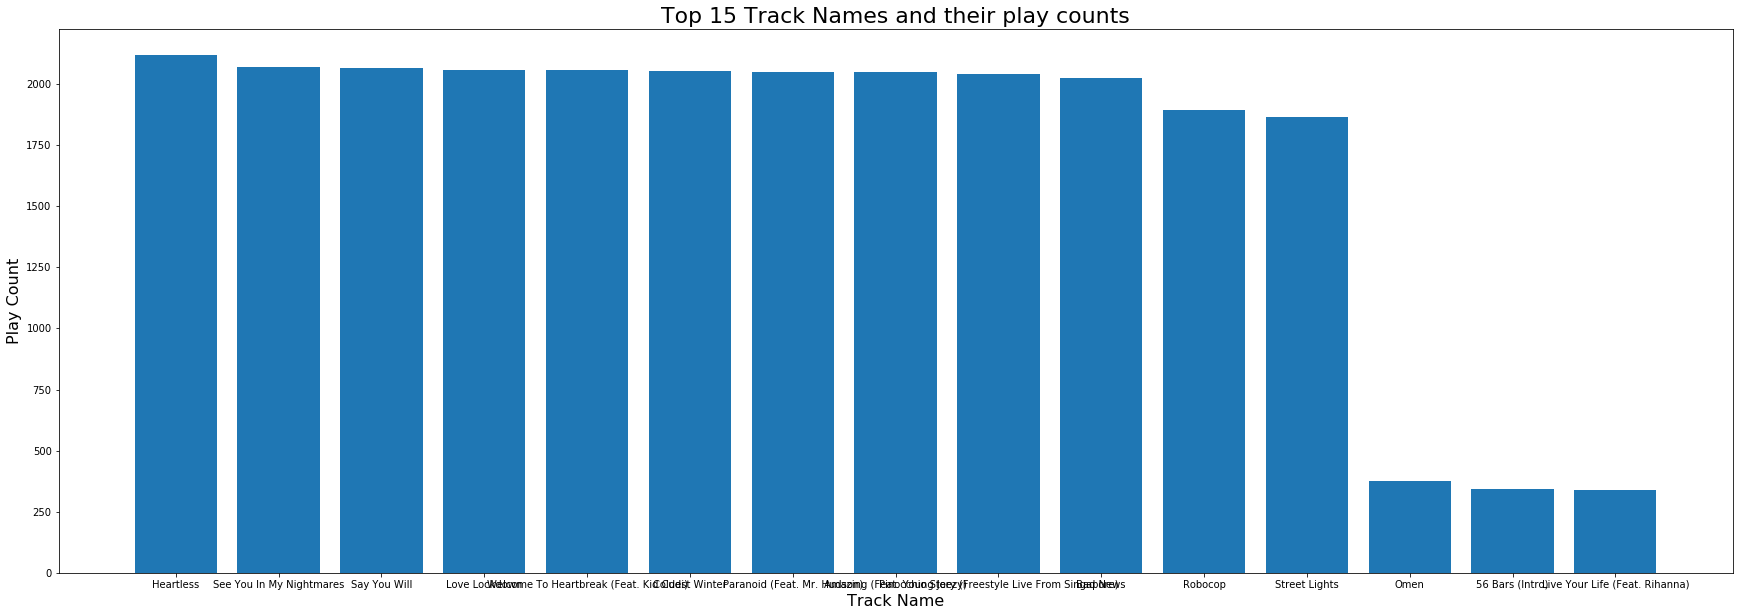

In [75]:
plt.figure(figsize=(30,10))
plt.bar(track, count)
plt.xlabel('Track Name', fontsize=16)
plt.ylabel('Play Count', fontsize=16)
plt.title('Top 15 Track Names and their play counts',fontsize=22)
plt.show()

### Task 4 (15 points) 

Using k-fold cross-validation, apply a linear regression model. Here, the response variable is the number of times a song has been played based on what we know about the listeners (in the data set generated in Task 1). Be sure to return the model score on both the training and validation data.

In [104]:
#importing the required package for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sklearn
%matplotlib inline

In [81]:
df_new.head()

,track_name,play_times,percent_male,average_age_listener,percent_once,percent_five+
0,Mr. Misery,4,0.0,27,0,0
1,Lights In The Sky,19,0.0,25,0,0
2,Just As The Tide Was Flowing,2,0.0,22,0,0
3,"Murder (Live, Bbc)",1,0.0,22,100,0
4,Noon As Dark As Midnight,2,0.0,27,0,0


In [100]:
#transforming our table data into arrays
lis1,lis2=[],[]
#for i in range(0,df_code.shape[0]):
for i in range(0,1000):
    lis1=[df_new.iloc[i][2], int(df_new.iloc[i][3]), int(df_new.iloc[i][4]), int(df_new.iloc[i][5])]
    np.array(lis1)
    lis2.append(lis1)

In [101]:
#details about the listeners
data1 = np.array(lis2) #data

#response variable: number of times the song has been played
data_t = np.array(df_new['play_times'][0:1000]) #target

In [102]:
data1 = data1.astype('int') #we can see that our data is successfully converted to an array
data1

array([[  0,  27,   0,   0],
       [  0,  25,   0,   0],
       [  0,  22,   0,   0],
       ...,
       [  0,  22, 100,   0],
       [  0,  26,   0,   0],
       [  0,  22, 100,   0]])

In [103]:
print('Data Shape', data1.shape)  #Shape of data and target
print('Target Shape', data_t.shape) 

('Data Shape', (1000, 4))
('Target Shape', (1000,))


In [108]:
data1 = sklearn.preprocessing.scale(data1, axis=0, with_mean=True, with_std=True, copy=True)
data_t = sklearn.preprocessing.scale(data_t, axis=0, with_mean=True, with_std=True, copy=True)

In [111]:
#split data set
X_train, X_test, y_train, y_test = train_test_split(data1, data_t, test_size=0.2)

### K-Fold Cross Validation

In [114]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

In [115]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X_train, y_train, cv=3) #3-fold
print('3-fold CV:' ,np.mean(cvscores_3))

# Perform 5-fold CV
cvscores_5 = cross_val_score(reg, X_train, y_train, cv=5) #5-fold
print('5-fold CV:' ,np.mean(cvscores_5) )

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X_train, y_train, cv=10) #10-fold
print('10-fold CV:', np.mean(cvscores_10)) 

('3-fold CV:', -1.3558842446277062)
('5-fold CV:', -0.7316950321845669)
('10-fold CV:', -0.6581391904034518)


In [116]:
y_pred = reg.predict(X_test)

In [121]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,-0.038429,0.167717
1,-0.099427,-0.091033
2,-0.084177,0.011693
3,-0.038429,-0.003339
4,-0.053678,0.011693


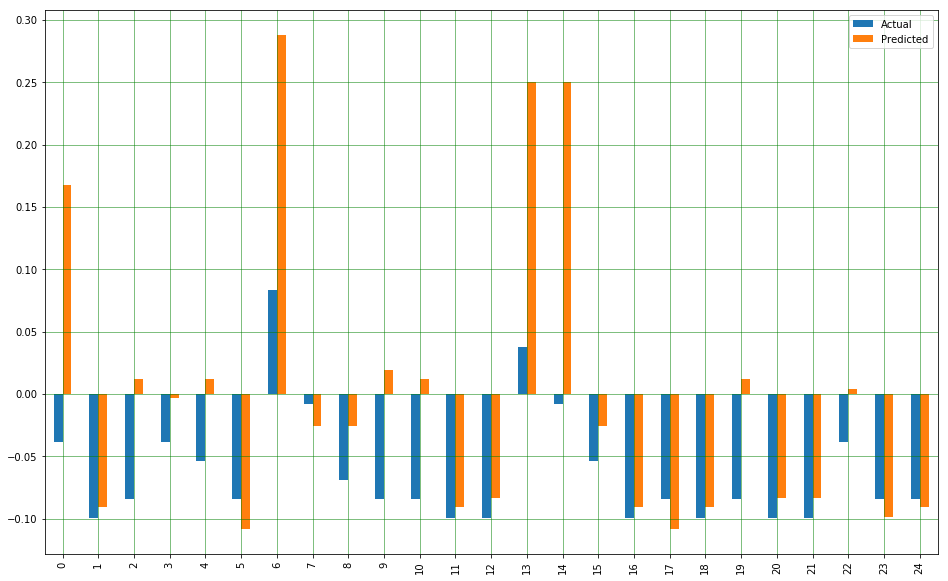

In [118]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [123]:
print('Score:', reg.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Score:', -0.022624891987956586)
('Mean Absolute Error:', 0.0910524380518606)
('Mean Squared Error:', 0.04933236659962913)
('Root Mean Squared Error:', 0.22210890706954803)


### Task 5 (5 points) 

Explain your results.  Specifically address, if the assumption of linear response to the input features was reasonable.  You will want to study a plot of the model's residual.  Ideally, the residuals are small in magnitude, and are evenly distributed about the true values.  What are some possible improvements that can be made?

In [127]:
df.head()

,Actual,Predicted
0,-0.038429,0.167717
1,-0.099427,-0.091033
2,-0.084177,0.011693
3,-0.038429,-0.003339
4,-0.053678,0.011693


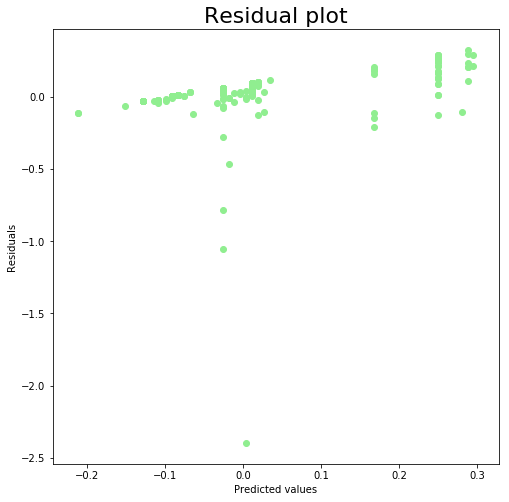

In [133]:
plt.figure(figsize=(8,8))
plt.scatter(df['Predicted'], df['Predicted']-df['Actual'], c='lightgreen', label='Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot',fontsize=22)
plt.show()

### Bonus Task (5 points) 

Suppose we are instead curious about whether a song will be played by a user based on a demographics.  Apply a linear SVM model and report your results.

In [134]:
from sklearn.svm import SVR

In [135]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [136]:
y_pred = regressor.predict(X_test)

In [137]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,-0.038429,0.075487
1,-0.099427,-0.004162
2,-0.084177,0.015409
3,-0.038429,0.026890
4,-0.053678,0.015409


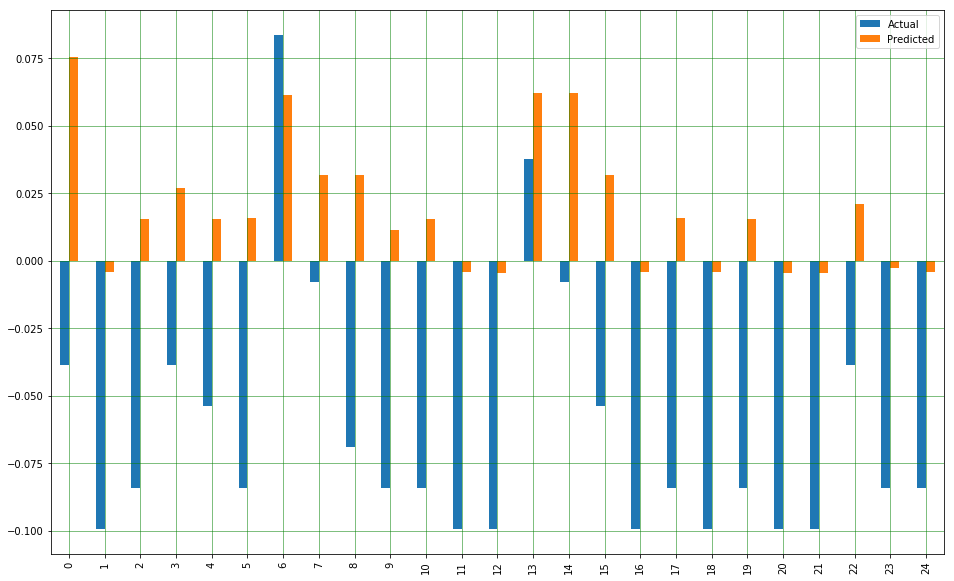

In [138]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [139]:
print('Score:', reg.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Score:', -0.022624891987956586)
('Mean Absolute Error:', 0.11006947479435145)
('Mean Squared Error:', 0.04642158908373499)
('Root Mean Squared Error:', 0.2154566988602002)


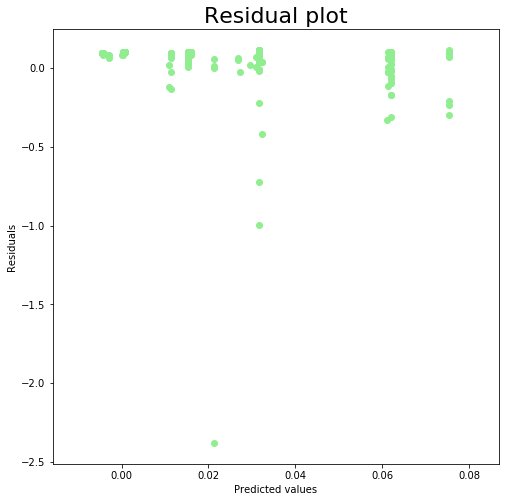

In [140]:
plt.figure(figsize=(8,8))
plt.scatter(df['Predicted'], df['Predicted']-df['Actual'], c='lightgreen', label='Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot',fontsize=22)
plt.show()

## Clustering 

For this part of the project you will consider methods to group members of U.S. House of Representatives based on their voting records.  The voting records from congress are available at [Office of the Clerk, US House of Representatives](http://clerk.house.gov/legislative/legvotes.aspx), but not in a form that is easily digestible for analysis.

In fact it was only in 2016, that Congress agreed to make legislative data available themselves.  [Govtrack.us](Govtrack.us) has links to primary data sources and api's projects that collect and release the data in easier digestible forms: 

* Github Congress project - https://github.com/unitedstates/congress 
* ProPublica's Congress API - https://projects.propublica.org/api-docs/congress-api/

A long-standing project to document congressional roll call votes at the [Inter-university Consortium for Political and Social Research (ICPSR)](https://www.icpsr.umich.edu/icpsrweb/ICPSR/series/159).  This data includes roll call votes from 1789 - 1990. The ICPSR formatting for storing this data has been used on other sites which are keeping up with the creating a record, e.g., at [UCLA](https://voteview.polisci.ucla.edu).  For more recent years of Congress, data is collected at the following site: [https://voteview.com/data](https://voteview.com/data)

For instance, to explore the 116th Congress, there are two formats for looking at the data: 

* `H116_votes.ord`  
* `H116_votes.csv` 

The format of the `H116_votes.ord` data file is similar to what you say in the GettingData portion of the course.  The data consists of many fixed width items listed for each Congressperson (including their votes for each roll call). For example, the first few lines start as: 

`1162137641 1ALABAMA 200  BYRNE      66616616 ...`  
`1162119241 2ALABAMA 200  ROBY       66616616 ...`  
`1162030141 3ALABAMA 200  ROGERS     66616616 ...` 

The structure of the data is (https://voteview.com/articles/data_help_members): 

* 3 Digits - Congress number 
* 5 Digits - ICPSR number (unique id for each member of Congress) 
* 2 Digits - ICPSR state code 
* 2 Digits - District number  
* 8 Characters - State name 
* 3 Digits - Party code: (broadly 100 - Democratic Party, 200 - Republican Party) https://voteview.com/articles/data_help_parties
* 2 Digits - ICPSR Occupancy and Office code
* 11 Characters - Member's name 
* Remaining Digits - Votes case  
information encoded using vote cast code: https://voteview.com/articles/data_help_votes

The format of the `H116_votes.csv` data file is structure differently.  For example the first few lines are: 

`congress,chamber,rollnumber,icpsr,cast_code,prob`  
`116,House,1,14066,6,100.0`  
`116,House,1,14657,6,100.0`  
`116,House,1,14854,6,100.0`

Information about each column of the data is given: https://voteview.com/articles/data_help_votes.

As of 11/20/19 there were 623 roll call votes in the 116th Congress.  
 

### Task 6 (10 points) 

You will need to collect the voting information for each member of 116th Congress. Using one of the two file format's provided. 

The first 6 votes of the 116th Congress have to do with electing the Speaker of the House and rules votes; remove these first 6 votes from further consideration.


In [75]:
df = pd.read_table('HS116_votes.csv', sep = ',') #reading the user profiles data

In [53]:
df.head()

,congress,chamber,rollnumber,icpsr,cast_code,prob
0,116,House,1,14066,6,100.0
1,116,House,1,14657,6,100.0
2,116,House,1,14854,6,100.0
3,116,House,1,14863,6,100.0
4,116,House,1,14873,1,99.9


In [54]:
df = df.drop(df.index[[0,1,2,3,4,5]])

In [55]:
df.head()

,congress,chamber,rollnumber,icpsr,cast_code,prob
6,116,House,1,15029,1,99.7
7,116,House,1,15124,1,100.0
8,116,House,1,15410,1,100.0
9,116,House,1,15431,1,100.0
10,116,House,1,15438,1,99.5


### Task 7 (15 points) 

Apply K-means clustering to the voting data, using Euclidean distance as a measure on the cast votes.  

Try several different values of $k$ and report back which should be selected (include a figure).  

In [56]:
from sklearn.cluster import KMeans
from sklearn import preprocessing 
from scipy.spatial.distance import cdist

In [57]:
df.cast_code.unique() #we have 4 unique classes

array([1, 6, 7, 9])

In [80]:
df = df.dropna() 

In [78]:
label_encoder = preprocessing.LabelEncoder() 
df['chamber']= label_encoder.fit_transform(df['chamber']) 

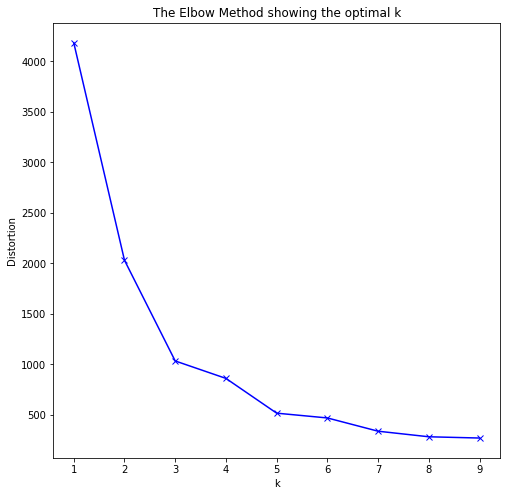

In [60]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Task 8 (10 points) 

Repeat the analysis but change the representation of the cast vote codes: 

| Original Code | New Code | 
|---------------|----------| 
|  0  |  0   |  
|  1  |  1   | 
|  2  |  1   | 
|  3  |  1   | 
|  4  |  3   | 
|  5  |  3   | 
|  6  |  3   | 
|  7  |  2   | 
|  8  |  2   | 
|  9  |  2   | 

Also, change the distance measure to Manhattan distance.   

In [67]:
df.cast_code.unique()

array([1, 6, 7, 9])

#### We have 4 unique values so here we replace original code to new codes

In [76]:
df["cast_code"] = df["cast_code"].map({1: 1, 6: 3, 7: 2, 9: 2})

In [77]:
df.cast_code.unique()

array([3, 1, 2])

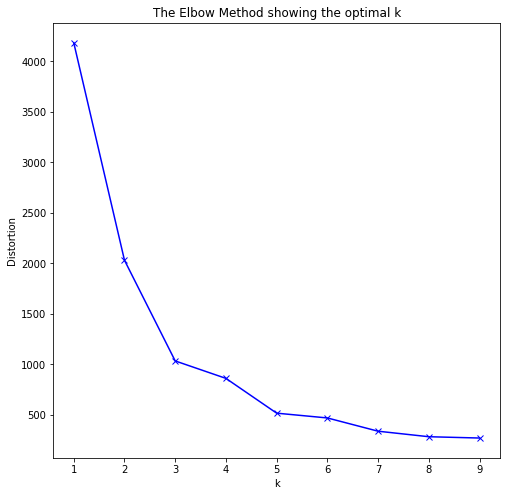

In [81]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [87]:
kmeans = KMeans(n_clusters=5).fit(df)

In [88]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.16000000e+02 3.00821196e-01 2.87043539e+02 1.50643235e+04
  1.73682987e+00 9.27890068e+01]
 [1.16000000e+02 9.12800621e-01 2.00199172e+02 4.16232214e+04
  1.64773726e+00 9.25768503e+01]
 [1.16000000e+02 1.88556526e-01 3.02102903e+02 2.96521863e+04
  1.67551687e+00 9.48466474e+01]
 [1.16000000e+02 6.54916512e-01 3.08985158e+02 9.34456865e+04
  1.58998145e+00 8.52126160e+01]
 [1.16000000e+02 3.47507723e-02 3.25011677e+02 2.13518319e+04
  1.82310530e+00 9.31835533e+01]]


### Task 9 (5 points) 

Report out the members (name, state, district) that are closest to the centroid of the clusters (using the results from Task 8).

Report out the members (name, state, district) that are furthest from the centroid of the clusters (using the results from Task 8).

In [82]:
df.head()

,congress,chamber,rollnumber,icpsr,cast_code,prob
0,116,0,1,14066,3,100.0
1,116,0,1,14657,3,100.0
2,116,0,1,14854,3,100.0
3,116,0,1,14863,3,100.0
4,116,0,1,14873,1,99.9


In [83]:
df2 = pd.read_table('HS116_members.csv', sep = ',') #reading the user profiles data

##### Closest to centroid 

In [90]:
from sklearn.metrics import pairwise_distances_argmin_min

In [91]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)
closest

array([102309, 261611, 107462, 270826, 117170])

In [95]:
df.iloc[[102309, 261611, 107462, 270826, 117170]]

,congress,chamber,rollnumber,icpsr,cast_code,prob
124325,116,0,289,15029,1,99.3
301391,116,1,195,41700,1,90.2
129910,116,0,301,29701,1,94.4
312206,116,1,303,94659,1,91.0
140050,116,0,325,21353,1,94.8


In [120]:
df_close1 = df2.loc[df['icpsr'] == 15029][['bioname','state_abbrev','district_code']]

In [115]:
df_close2 = df2.loc[df['icpsr'] == 41700][['bioname','state_abbrev','district_code']]

In [116]:
df_close3 = df2.loc[df['icpsr'] == 29701][['bioname','state_abbrev','district_code']]

In [117]:
df_close4 = df2.loc[df['icpsr'] == 94659][['bioname','state_abbrev','district_code']]

In [118]:
df_close5 = df2.loc[df['icpsr'] == 21353][['bioname','state_abbrev','district_code']]

In [123]:
df_close = df_close.append(df_close1)
df_close = df_close.append(df_close2)
df_close = df_close.append(df_close3)
df_close = df_close.append(df_close4)
df_close = df_close.append(df_close5)

In [124]:
df_close

,bioname,state_abbrev,district_code
6,"ADERHOLT, Robert",AL,4
440,"MURKOWSKI, Lisa",AK,0
6,"ADERHOLT, Robert",AL,4
440,"MURKOWSKI, Lisa",AK,0
6,"ADERHOLT, Robert",AL,4
440,"MURKOWSKI, Lisa",AK,0
409,"MCEACHIN, Aston Donald",VA,4
181,"HOYER, Steny Hamilton",MD,5


### Bonus 2 (5 points) 

Visualize the separation in cluster by party. 
Take your vote data from Task 8 and run PCA on this data set.  Create a scatter plot of the first two principal components with the points colored by party (red - republicans, blue - democrats).  

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [127]:
df.head()

,congress,chamber,rollnumber,icpsr,cast_code,prob
0,116,0,1,14066,3,100.0
1,116,0,1,14657,3,100.0
2,116,0,1,14854,3,100.0
3,116,0,1,14863,3,100.0
4,116,0,1,14873,1,99.9


In [131]:
x = df[['congress','chamber','rollnumber','icpsr','prob']]
y = df['cast_code']

In [143]:
y.unique()

array([3, 1, 2])

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [134]:
from sklearn.decomposition import PCA

In [135]:
pca = PCA(n_components=2)

In [137]:
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [139]:
finalDf = pd.concat([principalDf, df[['cast_code']]], axis = 1)

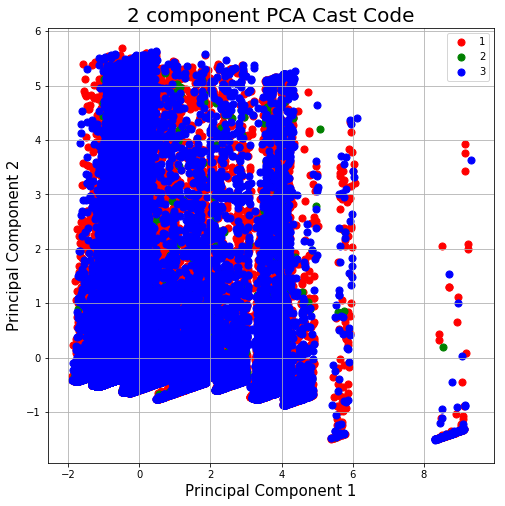

In [145]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Cast Code', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cast_code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()